# Operational Chroma Scan

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [21]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

## Function declarations

In [28]:
def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

In [3]:
def cubic(x, a, m, c, b):
    return a*x**2 + x*m + c + b*x**3

In [4]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)

In [5]:
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [6]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [7]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

## Load bunch data

In [8]:
# We have 7 simulations per scan 
dd = dict()

maxi = 30
turns = range(0, maxi)
print turns

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [9]:
folders = []
folders.append('01_01')
folders.append('01_02')
folders.append('01_03')
folders.append('01_04')
folders.append('01_05')
folders.append('01_06')
folders.append('01_07')


In [10]:
for fol in folders:
    dd_temp = dict()
    for t in turns:
        if t <= 9:    inputs = str(fol + '/bunch_output/mainbunch_00000' + str(int(t)) + '.mat')
        else:    inputs = str(fol + '/bunch_output/mainbunch_0000' + str(int(t)) + '.mat')
        #print inputs
        dd_temp = add_input_file(dd_temp, inputs, t+1)
    dd_temp = add_input_file(dd_temp, str(fol + '/bunch_output/mainbunch_-000001.mat'), 0)
    dd[int(fol[3:5])] = dd_temp

	Added output data from  01_01/bunch_output/mainbunch_000000.mat 	 dictionary key:  1
	Added output data from  01_01/bunch_output/mainbunch_000001.mat 	 dictionary key:  2
	Added output data from  01_01/bunch_output/mainbunch_000002.mat 	 dictionary key:  3
	Added output data from  01_01/bunch_output/mainbunch_000003.mat 	 dictionary key:  4
	Added output data from  01_01/bunch_output/mainbunch_000004.mat 	 dictionary key:  5
	Added output data from  01_01/bunch_output/mainbunch_000005.mat 	 dictionary key:  6
	Added output data from  01_01/bunch_output/mainbunch_000006.mat 	 dictionary key:  7
	Added output data from  01_01/bunch_output/mainbunch_000007.mat 	 dictionary key:  8
	Added output data from  01_01/bunch_output/mainbunch_000008.mat 	 dictionary key:  9
	Added output data from  01_01/bunch_output/mainbunch_000009.mat 	 dictionary key:  10
	Added output data from  01_01/bunch_output/mainbunch_000010.mat 	 dictionary key:  11
	Added output data from  01_01/bunch_output/mainbunc

In [11]:
sorted(dd.keys())

[1, 2, 3, 4, 5, 6, 7]

In [61]:
main_label = 'PS_Transfer_Test'
sc = 'noSC'
legend_label = r'$\frac{\delta p}{p_0}$'

In [13]:
# access all particle x co-ordinates like this
dd[1][0]['particles']['dE'][0][0][0]

array([-1.19141949e-03, -2.88998462e-03, -9.65324022e-04, -2.19364265e-04,
        2.46188998e-05,  1.45556421e-03, -3.31456825e-03, -2.82948635e-03,
       -1.60214793e-03, -2.28762342e-03,  1.01034402e-04, -1.48635065e-03,
       -3.47579098e-03,  1.82883661e-03, -1.36635555e-03,  1.58183634e-03,
       -3.17610649e-03,  2.37325748e-03, -2.13846106e-03, -2.49944355e-03,
        1.77705342e-03, -1.20870234e-03, -2.06891585e-03,  2.84090149e-04,
       -1.56365520e-03,  1.90783647e-03,  3.78644473e-04,  6.17094037e-04,
        2.77136158e-03,  8.50039705e-04, -2.54884903e-03,  1.98976134e-04,
       -1.88067965e-03, -1.40671797e-03, -7.91284057e-04,  3.02099169e-03,
        2.54232626e-03, -2.22917758e-03, -1.73825711e-03,  2.91478549e-04,
        9.40263651e-04])

# Load output data

In [16]:
ddo = dict()
ddo = add_input_file(ddo, '01_01/output/output.mat', -3E-3)
ddo = add_input_file(ddo, '01_02/output/output.mat', -2E-3)
ddo = add_input_file(ddo, '01_03/output/output.mat', -1E-3)
ddo = add_input_file(ddo, '01_04/output/output.mat', 0)
ddo = add_input_file(ddo, '01_05/output/output.mat', 1E-3)
ddo = add_input_file(ddo, '01_06/output/output.mat', 2E-3)
ddo = add_input_file(ddo, '01_07/output/output.mat', 3E-3)

	Added output data from  01_01/output/output.mat 	 dictionary key:  -0.003
	Added output data from  01_02/output/output.mat 	 dictionary key:  -0.002
	Added output data from  01_03/output/output.mat 	 dictionary key:  -0.001
	Added output data from  01_04/output/output.mat 	 dictionary key:  0
	Added output data from  01_05/output/output.mat 	 dictionary key:  0.001
	Added output data from  01_06/output/output.mat 	 dictionary key:  0.002
	Added output data from  01_07/output/output.mat 	 dictionary key:  0.003


In [17]:
main_label = 'Operational_Chroma'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 15
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

In [23]:
ddo[0].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

(-1, 30)

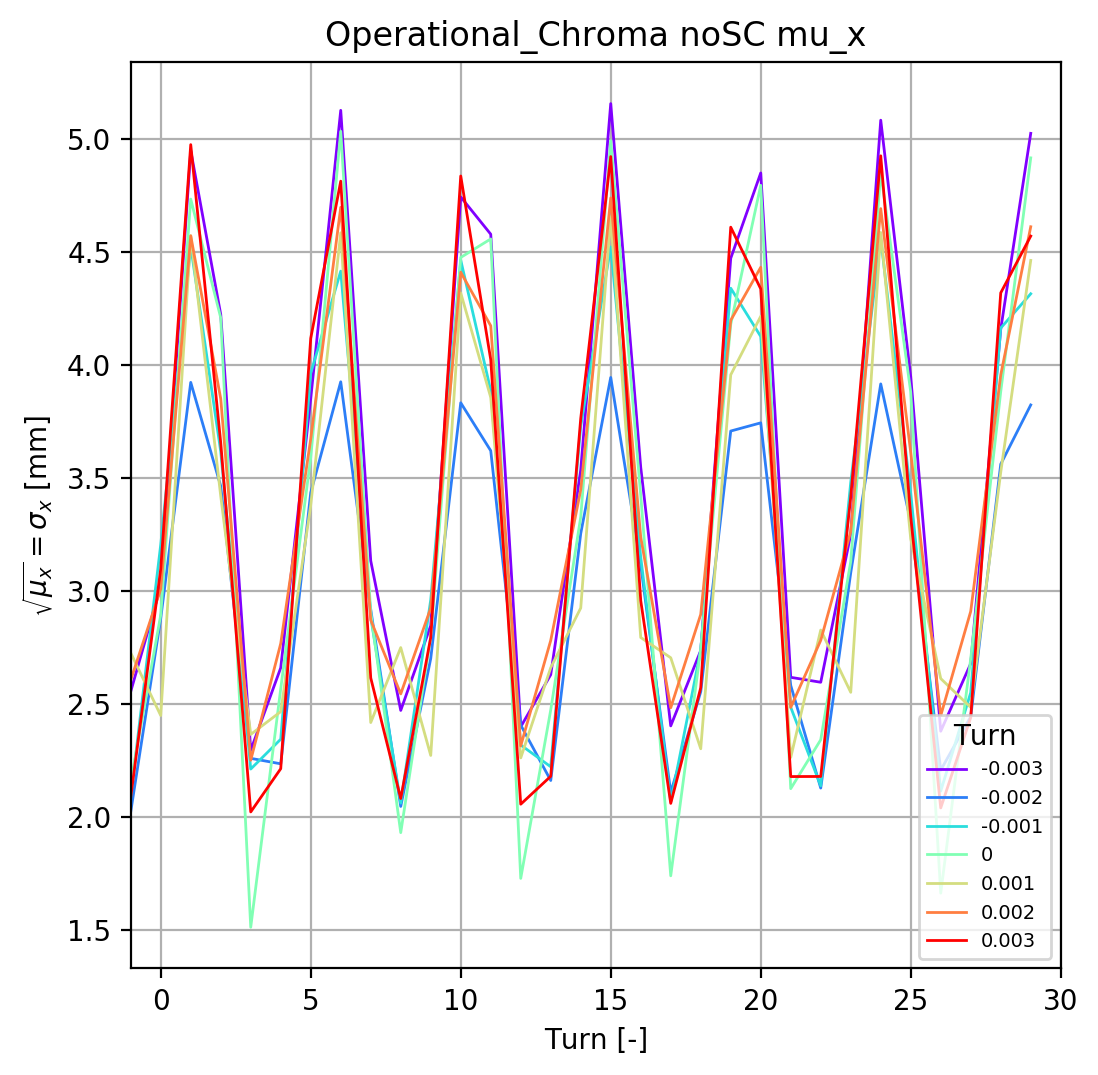

In [22]:
parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_x} = \sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):
        ax1.plot(ddo[key]['turn'][0], np.sqrt(ddo[key][parameter][0])*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30)

#savename = 'Plots/Param_' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

(-1, 30)

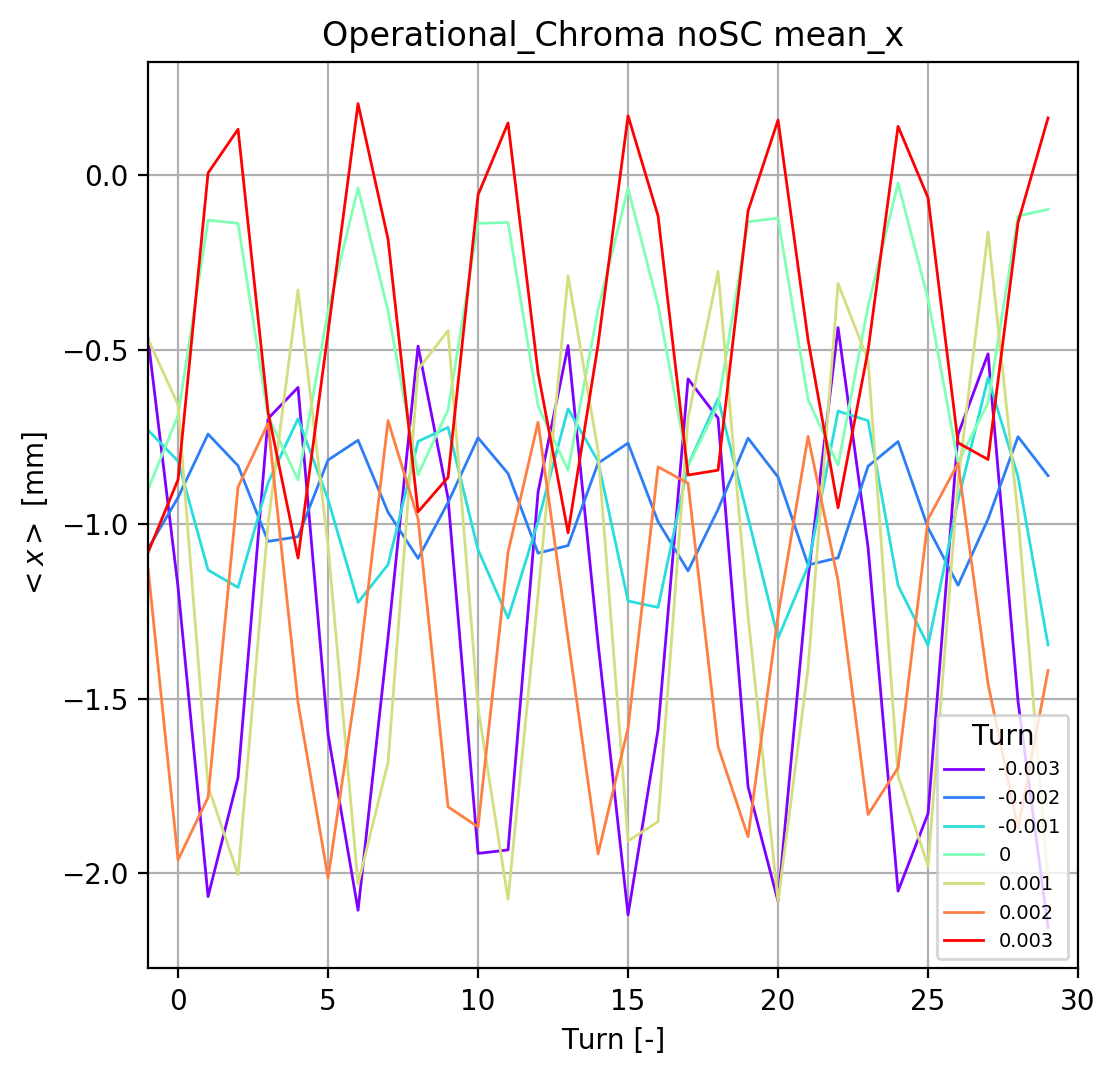

In [27]:
parameter = 'mean_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$<x>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):
        ax1.plot(ddo[key]['turn'][0], ddo[key][parameter][0]*1e3, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30)

#savename = 'Plots/Simple_50um/Param_' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

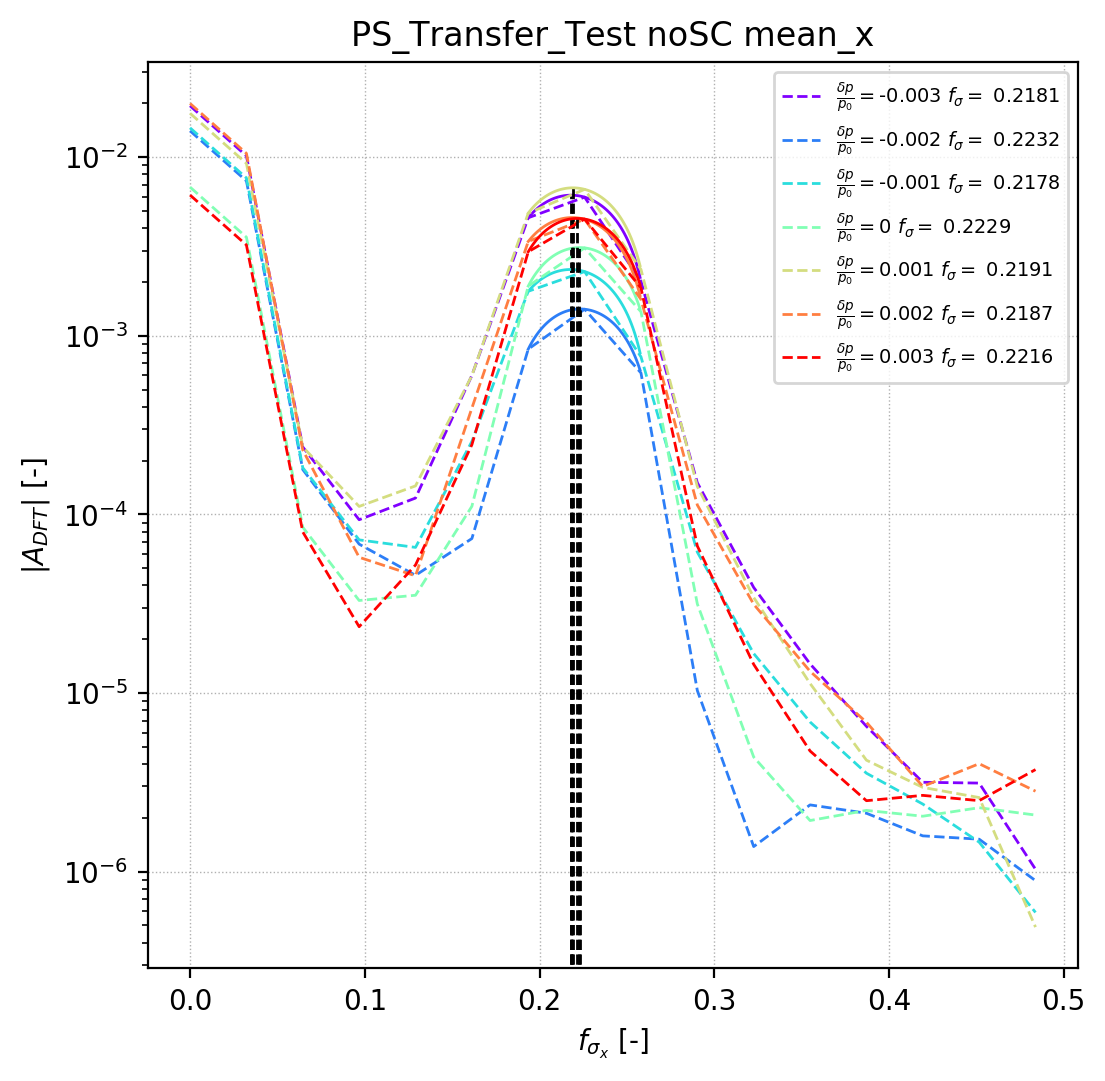

In [94]:
# Store envelope oscillation frequencies
f_sig_x = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{x}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_x'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_x.append(f_max)
    
ax1.legend(fontsize='x-small', loc=1)
ax1.grid(lw=0.5, ls=':')

savename = 'Plots/Simple_50um/x_fft.png'
plt.savefig(savename, dpi = 800);

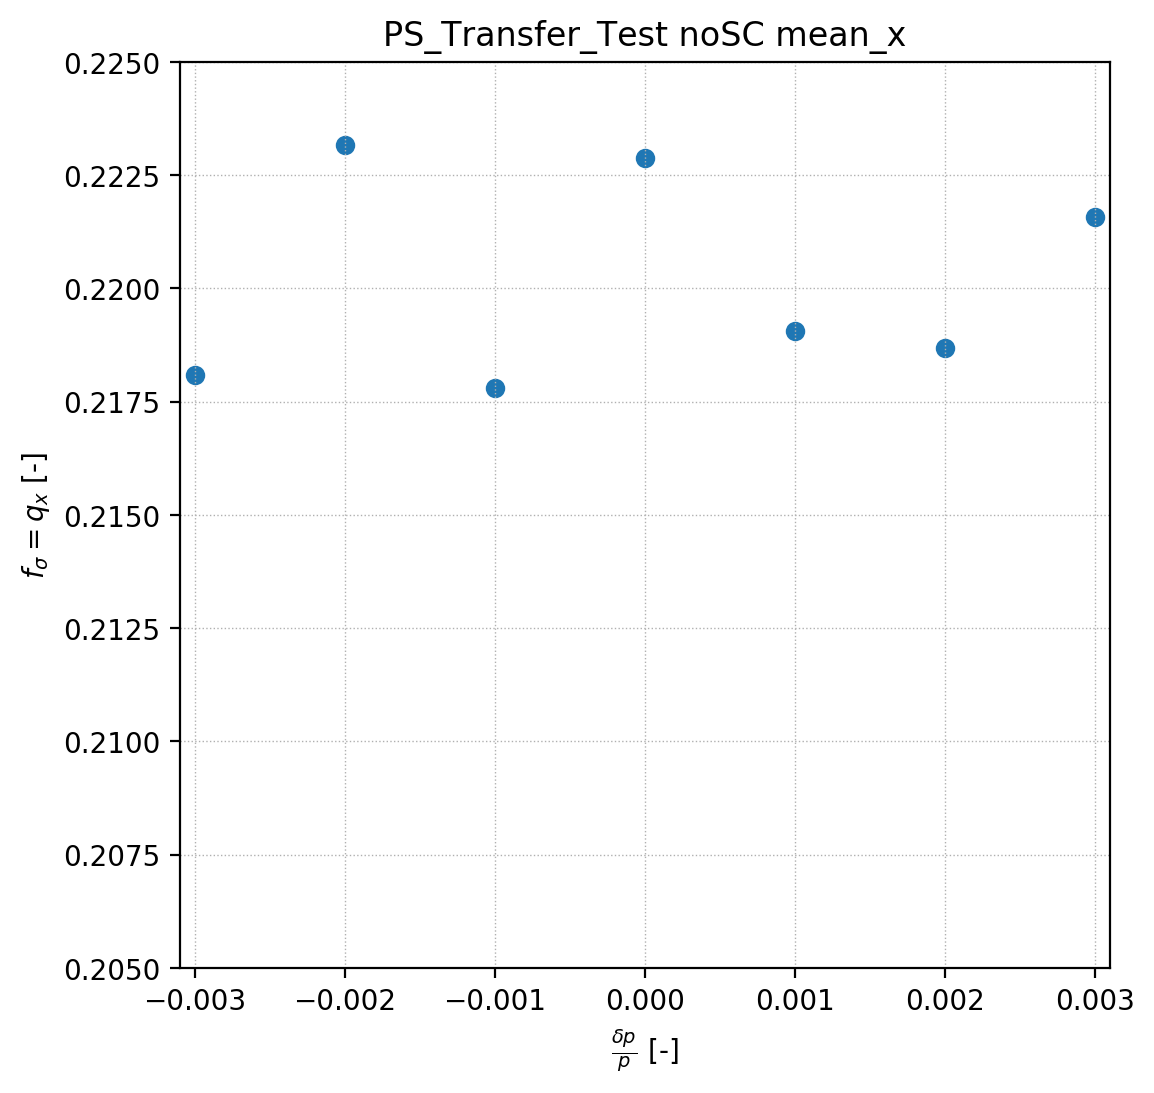

In [96]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' ' + parameter;
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];

ax1.scatter(dps, f_sig_x);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

savename = 'Plots/Simple_50um/qx.png'
plt.savefig(savename, dpi = 800);

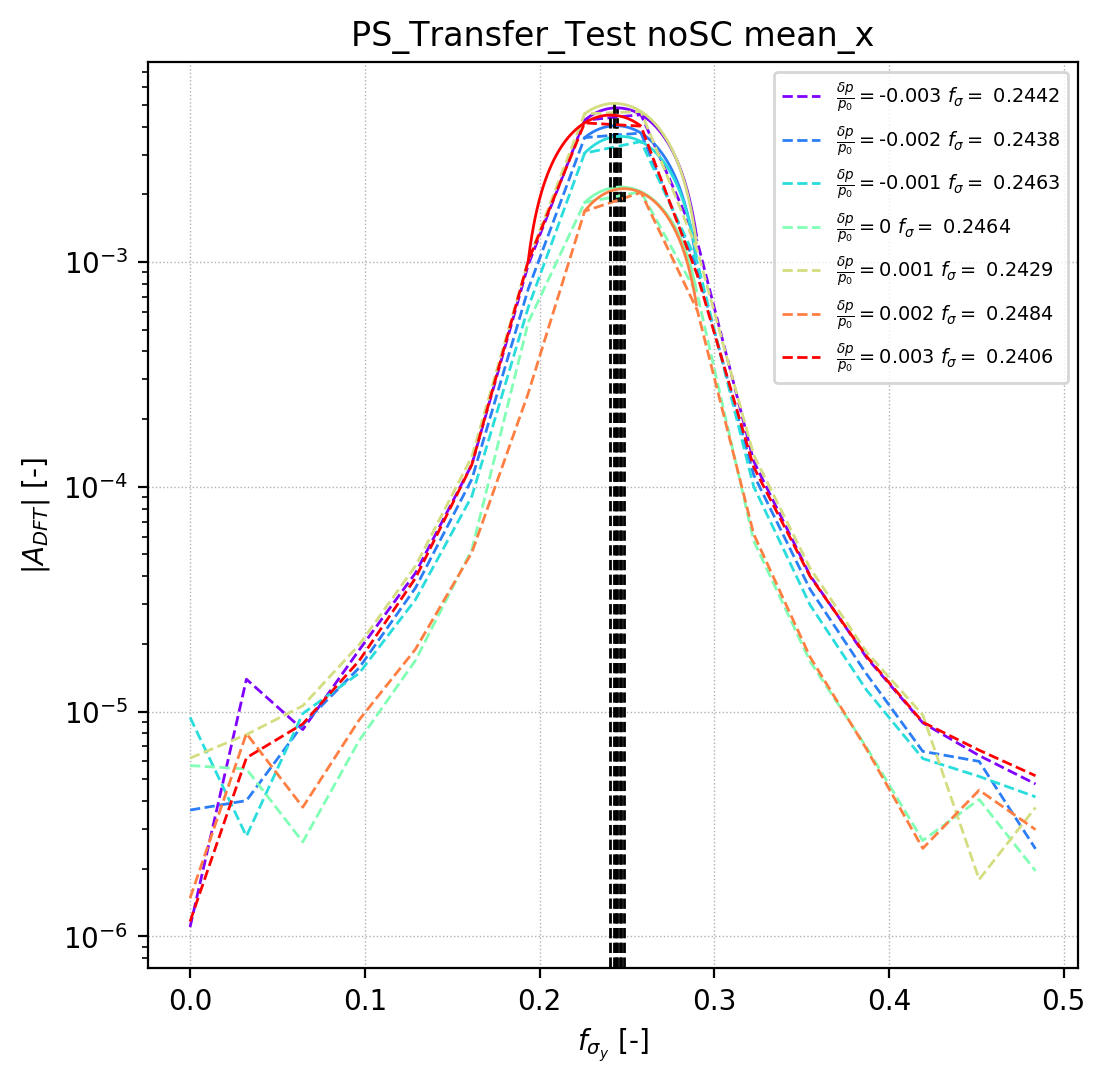

In [97]:
# Store envelope oscillation frequencies
f_sig_y = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{y}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_y'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_y.append(f_max)
    
ax1.legend(fontsize='x-small', loc=1)
ax1.grid(lw=0.5, ls=':')

savename = 'Plots/Simple_50um/y_fft.png'
plt.savefig(savename, dpi = 800);

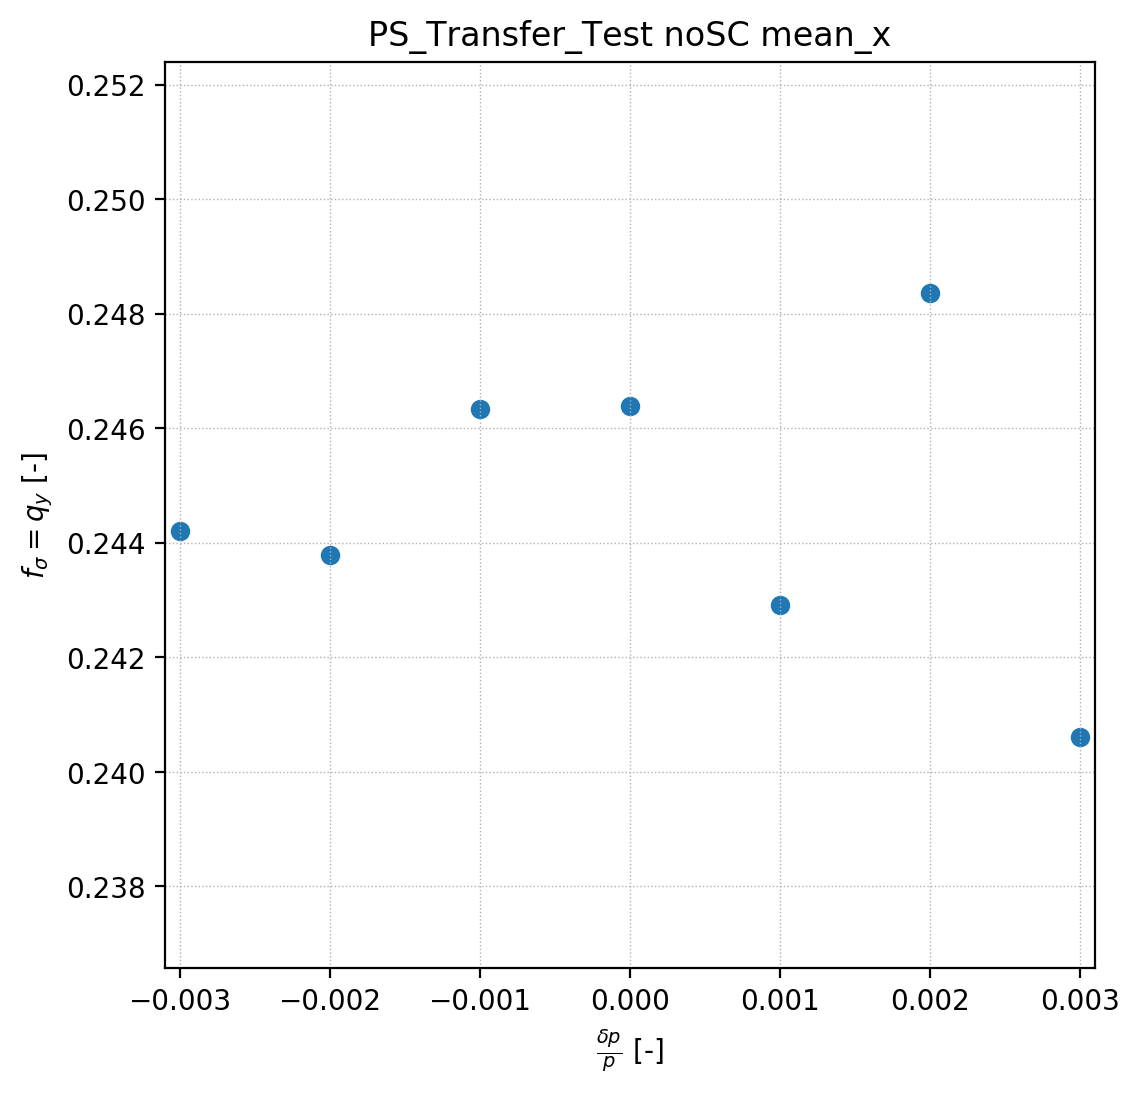

In [98]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' ' + parameter;
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];

ax1.scatter(dps, f_sig_y);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

savename = 'Plots/Simple_50um/qy.png'
plt.savefig(savename, dpi = 800);